In [131]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Step 1:導入資料

In [132]:
file = pd.read_csv('./complaints.csv',
                  parse_dates=['Date received','Date sent to company'])
file.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-05-28,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Although I am checking for and addressing miss...,NaN,"EQUIFAX, INC.",GA,310XX,NaN,Consent provided,Web,2019-05-28,Closed with explanation,Yes,NaN,3255189
1,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
2,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-05-03,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OK,735XX,NaN,NaN,Referral,2019-05-03,Closed with explanation,Yes,NaN,3231144
5,2019-07-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,914XX,NaN,Consent provided,Web,2019-07-26,Closed with explanation,Yes,NaN,3319331
6,2019-07-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Hello This complaint is against the three cred...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,109XX,NaN,Consent provided,Web,2019-07-08,Closed with explanation,Yes,NaN,3299394
7,2019-10-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,925XX,NaN,Other,Web,2019-10-24,Closed with explanation,Yes,NaN,3416481
8,2019-11-20,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,Company has responded to the consumer and the ...,PENTAGON FEDERAL CREDIT UNION,VA,22304,NaN,NaN,Referral,2019-11-21,Closed with explanation,Yes,NaN,3446074
9,2019-11-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,Today XX/XX/XXXX went online to dispute the in...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,330XX,NaN,Consent provided,Web,2019-11-22,Closed with explanation,Yes,NaN,3446975


# Step 2-1:資料閱讀

### Date received：日期
### Product：產品分類
### Sub-product：產品副分類
### Issue：問題分類
### Sub-issue：問題副分類
### Consumer complaint narrative：問題敘述
### Company public response：公司回應
### Company：公司
### State：州別
### ZIP code：郵遞區碼
### Tags：消費者分類
### Consumer consent provided?：消費者同意書提供
### Submitted via：使用管道
### Date sent to company	Company：送抵公司日期
### response to consumer	：公司回復形式
### Timely response?：及時回復與否
### Consumer disputed?：消費者爭議與否
### Complaint ID：投訴編號

In [133]:
df = file.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766976 entries, 0 to 1766975
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          datetime64[ns]
 14  Company response to consumer  object        
 15  Timely response?              ob

In [134]:
df.shape

(1766976, 18)

In [135]:
col_uni={}
for i in df.columns:
    col_uni[i]=[len(df[i].unique()),df[i].unique()]
df_count= pd.DataFrame(col_uni).T
df_count.columns = ['uni_num', 'diff_ans']
df_count

,uni_num,diff_ans
Date received,3219,"[2019-05-28T00:00:00.000000000, 2019-09-24T00:..."
Product,18,"[Credit reporting, credit repair services, or ..."
Sub-product,77,"[Credit reporting, I do not know, General-purp..."
Issue,166,[Problem with a credit reporting company's inv...
Sub-issue,219,[Their investigation did not fix an error on y...
Consumer complaint narrative,554156,[Although I am checking for and addressing mis...
Company public response,12,"[nan, Company has responded to the consumer an..."
Company,5747,"[EQUIFAX, INC., TRANSWORLD SYSTEMS INC, Experi..."
State,64,"[GA, FL, PA, NC, OK, CA, NY, VA, NV, MD, IL, C..."
ZIP code,24751,"[310XX, 335XX, 15206, 275XX, 735XX, 914XX, 109..."


In [136]:
for i in df_count.index:
    print(df_count.loc[i, 'diff_ans'])

['2019-05-28T00:00:00.000000000' '2019-09-24T00:00:00.000000000'
 '2019-09-19T00:00:00.000000000' ... '2013-12-08T00:00:00.000000000'
 '2013-09-29T00:00:00.000000000' '2011-12-25T00:00:00.000000000']
['Credit reporting, credit repair services, or other personal consumer reports'
 'Debt collection' 'Credit card or prepaid card'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Mortgage' 'Checking or savings account'
 'Student loan' 'Payday loan, title loan, or personal loan' 'Credit card'
 'Consumer Loan' 'Bank account or service' 'Payday loan'
 'Credit reporting' 'Other financial service' 'Prepaid card'
 'Money transfers' 'Virtual currency']
['Credit reporting' 'I do not know'
 'General-purpose credit card or charge card'
 'Other personal consumer report' 'Medical debt' 'Other debt'
 'Domestic (US) money transfer' 'Lease' 'Conventional home mortgage'
 'Checking account' 'Mortgage debt' 'FHA mortgage'
 'Federal student loan servicing' 'Other type of mortgag

In [137]:
df_count.loc['Product','diff_ans']

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Credit card or prepaid card',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Mortgage', 'Checking or savings account',
       'Student loan', 'Payday loan, title loan, or personal loan',
       'Credit card', 'Consumer Loan', 'Bank account or service',
       'Payday loan', 'Credit reporting', 'Other financial service',
       'Prepaid card', 'Money transfers', 'Virtual currency'],
      dtype=object)

In [138]:
df_count.loc['Sub-product','diff_ans']

array(['Credit reporting', 'I do not know',
       'General-purpose credit card or charge card',
       'Other personal consumer report', 'Medical debt', 'Other debt',
       'Domestic (US) money transfer', 'Lease',
       'Conventional home mortgage', 'Checking account', 'Mortgage debt',
       'FHA mortgage', 'Federal student loan servicing',
       'Other type of mortgage', 'Private student loan',
       'Other banking product or service', 'Government benefit card',
       'Federal student loan debt', 'Credit card debt', 'VA mortgage',
       'Store credit card', 'Loan', 'Installment loan', 'Savings account',
       'General-purpose prepaid card', 'Private student loan debt',
       'Gift card', 'Title loan', nan, 'Payday loan debt', 'Credit card',
       'Payday loan', 'Credit repair services',
       'Mobile or digital wallet', 'Personal line of credit',
       'Virtual currency', 'Home equity loan or line of credit (HELOC)',
       'Other mortgage', 'CD (Certificate of Deposit)',

In [139]:
df_count.loc['Consumer consent provided?', 'diff_ans']

array(['Consent provided', 'Consent not provided', nan, 'Other',
       'Consent withdrawn'], dtype=object)

In [140]:
df_count.loc['Company response to consumer', 'diff_ans']

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Untimely response', 'Closed with monetary relief', 'Closed',
       'Closed with relief', 'In progress', 'Closed without relief', nan],
      dtype=object)

## Step 2-2:Product 欄位資料探勘

### 1. 信用卡及預借現金卡

In [141]:
df[df['Product'] == 'Credit card or prepaid card']['Sub-product'].unique()

array(['General-purpose credit card or charge card',
       'Government benefit card', 'Store credit card',
       'General-purpose prepaid card', 'Gift card', 'Payroll card',
       'Student prepaid card'], dtype=object)

In [142]:
df[df['Product'] == 'Credit card']['Sub-product'].unique()

array([nan], dtype=object)

In [143]:
df[df['Product'] == 'Prepaid card']['Sub-product'].unique()

array(['Gift or merchant card', 'Government benefit payment card',
       'General purpose card', 'Other special purpose card',
       'Mobile wallet', 'Payroll card', 'ID prepaid card',
       'Electronic Benefit Transfer / EBT card', 'Transit card'],
      dtype=object)

### 2. 信用問題

In [144]:
df[df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports']['Sub-product'].unique()

array(['Credit reporting', 'Other personal consumer report',
       'Credit repair services', 'Conventional home mortgage'],
      dtype=object)

In [145]:
df[df['Product'] == 'Credit reporting']['Sub-product'].unique()

array([nan], dtype=object)

In [146]:
df[df['Product'] == 'Mortgage']['Sub-product'].unique()

array(['Conventional home mortgage', 'FHA mortgage',
       'Other type of mortgage', 'VA mortgage',
       'Home equity loan or line of credit (HELOC)', 'Other mortgage',
       'Reverse mortgage', 'Conventional fixed mortgage',
       'Conventional adjustable mortgage (ARM)',
       'Home equity loan or line of credit', 'Second mortgage'],
      dtype=object)

### 3. 資金轉移及虛擬貨幣

In [147]:
df[df['Product'] == 'Money transfer, virtual currency, or money service']['Sub-product'].unique()

array(['Domestic (US) money transfer', 'Mobile or digital wallet',
       'Virtual currency', 'International money transfer',
       'Refund anticipation check', 'Debt settlement', 'Money order',
       'Check cashing service', "Traveler's check or cashier's check",
       'Foreign currency exchange'], dtype=object)

In [148]:
df[df['Product'] == 'Money transfers']['Sub-product'].unique()

array(['International money transfer', 'Domestic (US) money transfer'],
      dtype=object)

In [149]:
df[df['Product'] == 'Virtual currency']['Sub-product'].unique()

array(['Domestic (US) money transfer', 'International money transfer'],
      dtype=object)

In [150]:
df[df['Product'] == 'Other financial service']['Sub-product'].unique()

array(['Check cashing', 'Debt settlement', 'Credit repair',
       'Foreign currency exchange', 'Money order',
       'Traveler’s/Cashier’s checks', 'Refund anticipation check'],
      dtype=object)

### 4. 貸款

In [151]:
df[df['Product'] == 'Payday loan, title loan, or personal loan']['Sub-product'].unique()

array(['Installment loan', 'Title loan', 'Payday loan',
       'Personal line of credit', 'Pawn loan'], dtype=object)

In [152]:
df[df['Product'] == 'Payday loan']['Sub-product'].unique()

array([nan], dtype=object)

In [153]:
df[df['Product'] == 'Consumer Loan']['Sub-product'].unique()

array(['Installment loan', 'Vehicle loan', 'Personal line of credit',
       'Title loan', 'Vehicle lease', 'Pawn loan'], dtype=object)

In [154]:
df[df['Product'] == 'Vehicle loan or lease']['Sub-product'].unique()

array(['Lease', 'Loan', 'Title loan'], dtype=object)

In [155]:
df[df['Product'] == 'Student loan']['Sub-product'].unique()

array(['Federal student loan servicing', 'Private student loan',
       'Non-federal student loan'], dtype=object)

# Step 2-3 資料清理

## 1. Credit Cards & Prepaid Card

In [156]:
# transfering sub-product of credit card from NaN to credit card
df.loc[df['Product']=='Credit card','Sub-product'] = 'Credit card'
# transfering product of credit card from credit card into credit card / prepaid card
df['Product'].replace('Credit card','Credit card/Prepaid card',inplace=True)
df['Product'].replace('Prepaid card','Credit card/Prepaid card',inplace=True)
df['Product'].replace('Credit card or prepaid card','Credit card/Prepaid card',inplace=True)

## 2. Credit reporting

In [157]:
df[df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports'].groupby(['Sub-product']).count()

,Date received,Product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Sub-product,,,,,,,,,,,,,,,,,
Conventional home mortgage,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1
Credit repair services,1486,1486,1486,0,930,579,1486,1423,1195,308,1310,1486,1486,1486,1486,0,1486
Credit reporting,497651,497651,497651,488588,201186,300716,497651,490010,448672,48209,441405,497651,497651,497649,497651,0,497651
Other personal consumer report,5813,5813,5813,5813,3088,2446,5813,5695,4981,948,5309,5813,5813,5813,5813,0,5813


In [158]:
# Cause the big quantity gap in 'Credit reporting, credit repair services, or other personal consumer reports' so take all the choice into credit reporting
df['Product'].replace('Credit reporting, credit repair services, or other personal consumer reports',
                      'Credit reporting',inplace=True)

## 3. Money transfer, virtual currency

In [159]:
df[df['Product'] == 'Money transfer, virtual currency, or money service'].groupby(['Sub-product']).count()

,Date received,Product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Sub-product,,,,,,,,,,,,,,,,,
Check cashing service,318,318,318,0,182,175,318,306,256,53,244,318,318,318,318,0,318
Debt settlement,473,473,473,0,135,154,473,383,343,91,196,473,473,473,473,0,473
Domestic (US) money transfer,5712,5712,5712,0,3142,1801,5712,5456,4667,914,4739,5712,5712,5712,5712,0,5712
Foreign currency exchange,222,222,222,0,128,57,222,192,165,32,192,222,222,222,222,0,222
International money transfer,3225,3225,3225,0,1467,648,3225,2392,2085,533,2291,3225,3225,3225,3225,0,3225
Mobile or digital wallet,5678,5678,5678,0,3209,838,5678,5244,4449,605,4515,5678,5678,5678,5678,0,5678
Money order,357,357,357,0,165,84,357,333,302,68,245,357,357,357,357,0,357
Refund anticipation check,185,185,185,0,110,82,185,166,138,37,162,185,185,185,185,0,185
Traveler's check or cashier's check,387,387,387,0,183,220,387,372,337,83,308,387,387,387,387,0,387


In [160]:
df.loc[df['Sub-product'] =='Domestic (US) money transfer','Product']='Money transfers'
df.loc[df['Sub-product']=='International money transfer','Product']='Money transfers'

df.loc[df['Sub-product'] =='Virtual currency','Product']='Virtual currency'
df.loc[df['Sub-product'] =='Mobile or digital wallet','Product']='Virtual currency'

df['Product'].replace('Money transfer, virtual currency, or money service',
                      'Other financial service',inplace=True)

## 4. Loan

In [161]:
df[df['Product'] == 'Payday loan, title loan, or personal loan'].groupby(['Sub-product']).count()

,Date received,Product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Sub-product,,,,,,,,,,,,,,,,,
Installment loan,6071,6071,6071,518,3303,2045,6071,5841,4980,1142,4602,6071,6071,6071,6071,0,6071
Pawn loan,35,35,35,0,21,5,35,35,29,11,31,35,35,35,35,0,35
Payday loan,4298,4298,4298,258,2445,1250,4298,4167,3491,675,3630,4298,4298,4298,4298,0,4298
Personal line of credit,3025,3025,3025,264,1406,1432,3025,2856,2473,583,1983,3025,3025,3025,3025,0,3025
Title loan,1328,1328,1328,25,820,349,1328,1285,1092,288,1099,1328,1328,1328,1328,0,1328


In [162]:
df[df['Product'] == 'Consumer Loan'].groupby(['Sub-product']).count()

,Date received,Product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Sub-product,,,,,,,,,,,,,,,,,
Installment loan,8699,8699,8699,0,3093,2590,8699,8675,7837,1924,5316,8699,8699,8699,8699,8699,8699
Pawn loan,94,94,94,0,34,29,94,94,87,24,61,94,94,94,94,94,94
Personal line of credit,1824,1824,1824,0,44,321,1824,1801,1789,295,74,1824,1824,1824,1824,1824,1824
Title loan,547,547,547,0,199,131,547,543,495,124,311,547,547,547,547,547,547
Vehicle lease,2658,2658,2658,0,962,492,2658,2646,2410,375,1499,2658,2658,2658,2658,2658,2658
Vehicle loan,17782,17782,17782,0,5141,4188,17782,17664,16434,2520,8130,17782,17782,17782,17782,17782,17782


In [163]:
df[df['Product'] == 'Vehicle loan or lease'].groupby(['Sub-product']).count()

,Date received,Product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Sub-product,,,,,,,,,,,,,,,,,
Lease,3283,3283,3283,3280,1864,673,3283,3185,2723,508,2701,3283,3283,3283,3283,0,3283
Loan,16462,16462,16462,16457,8496,6095,16462,15740,13704,2907,12079,16462,16462,16462,16462,0,16462
Title loan,17,17,17,16,12,4,17,17,15,3,16,17,17,17,17,0,17


In [164]:
df.loc[(df['Product']=='Consumer Loan'),'Product']= 'Consumer loan'
df.loc[(df['Product']=='Payday loan, title loan, or personal loan') & (df['Sub-product']=='Payday loan'),'Product']= 'Payday loan'
df.loc[(df['Product']=='Payday loan, title loan, or personal loan') ,'Product']= 'Consumer loan'
df.loc[(df['Product']=='Consumer loan') & ((df['Sub-product']=='Vehicle lease') | (df['Sub-product']=='Vehicle loan')),'Product']= 'Vehicle loan or lease'
df.loc[(df['Product']=='Vehicle loan or lease') & (df['Sub-product']=='Title loan') ,'Product']= 'Consumer Loan'
df.loc[(df['Product']=='Vehicle loan or lease') & (df['Sub-product']=='Vehicle lease') ,'Sub-product']= 'Lease'
df.loc[(df['Product']=='Vehicle loan or lease') & (df['Sub-product']=='Vehicle Loan') ,'Sub-product']= 'Loan'

In [165]:
df['Product'].replace('Bank account or service','Bank account/service',inplace=True)
df['Product'].replace('Vehicle loan or lease','Vehicle loan/lease',inplace=True)                            
df['Product'].replace('Checking or savings account','Checking/Savings account',inplace=True)

In [166]:
df['Product'].unique()

array(['Credit reporting', 'Debt collection', 'Credit card/Prepaid card',
       'Money transfers', 'Vehicle loan/lease', 'Mortgage',
       'Checking/Savings account', 'Student loan', 'Consumer loan',
       'Payday loan', 'Virtual currency', 'Other financial service',
       'Bank account/service', 'Consumer Loan'], dtype=object)

In [167]:
#儲存成csv
df.to_csv('complaints_clean.csv')

# Step 3-1:基本資料分析

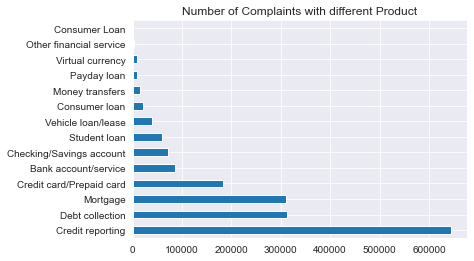

In [168]:
sns.set_style('darkgrid')
df['Product'].value_counts().plot(kind='barh', title='Number of Complaints with different Product')

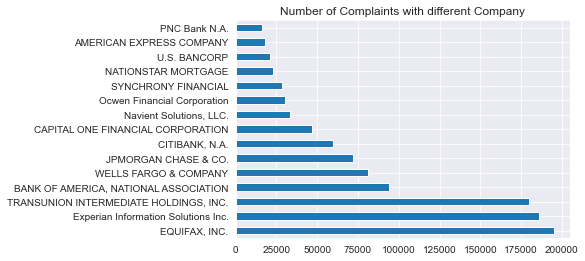

In [169]:
df['Company'].value_counts().head(15).plot(kind='barh', title='Number of Complaints with different Company')

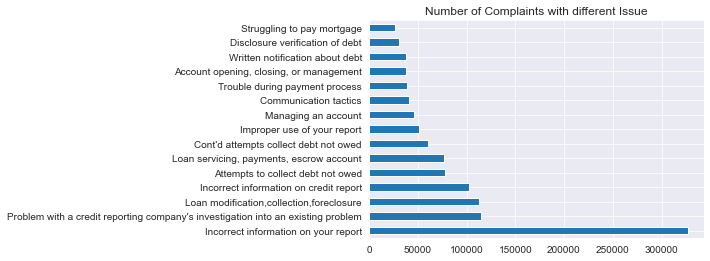

In [170]:
df['Issue'].value_counts().head(15).plot(kind='barh', title='Number of Complaints with different Issue')

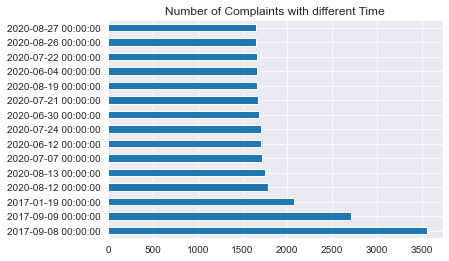

In [171]:
df['Date received'].value_counts().head(15).plot(kind='barh', title='Number of Complaints with different Time')

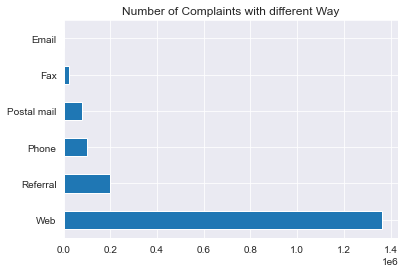

In [172]:
df['Submitted via'].value_counts().plot(kind='barh', title='Number of Complaints with different Way')

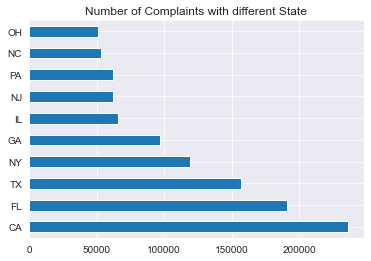

In [173]:
df['State'].value_counts().head(10).plot(kind='barh', title='Number of Complaints with different State')

# Step 3-2 進階資料分析

In [174]:
df.set_index('Date received',inplace=True)
df.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Date received,,,,,,,,,,,,,,,,,
2019-05-28,Credit reporting,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Although I am checking for and addressing miss...,NaN,"EQUIFAX, INC.",GA,310XX,NaN,Consent provided,Web,2019-05-28,Closed with explanation,Yes,NaN,3255189
2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
2019-09-19,Credit reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
2019-05-03,Credit reporting,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OK,735XX,NaN,NaN,Referral,2019-05-03,Closed with explanation,Yes,NaN,3231144


In [185]:
date_week = df.groupby(df.index.dayofweek)['Issue'].agg([('Count','count')])
week_rank = pd.DataFrame(date_week)
week_rank

,Count
Date received,
0,278801
1,329301
2,328584
3,316098
4,287928
5,127059
6,99204


In [181]:
date_month = df.resample('M',closed='right',label='right',kind='period')['Product'].agg([('Count','count')])
month_rank = pd.DataFrame(date_month).reset_index()
month_rank.sort_values('Count', ascending= False).head(10)

,Date received,Count
103,2020-07,40660
104,2020-08,39129
102,2020-06,37908
101,2020-05,36998
100,2020-04,34810
99,2020-03,29495
69,2017-09,27357
97,2020-01,26406
92,2019-08,26059
94,2019-10,25636


In [176]:
date_year = df.resample('Y',closed='right',label='right',kind='period')['Product'].agg([('Count','count')])
year_rank = pd.DataFrame(date_year)
year_rank.head()
year_rank.index.strftime('%Y')

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object', name='Date received')

In [184]:
jan_aus_2020 = df['01/01/2020':'08/31/2020'].index.value_counts()
jan_aus_2020_rank = pd.DataFrame(list(zip(jan_aus_2020.index,jan_aus_2020.values)),
                                 columns=['Date received','Count']).sort_values('Date received')
jan_aus_2020_rank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 243 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date received  244 non-null    datetime64[ns]
 1   Count          244 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.7 KB


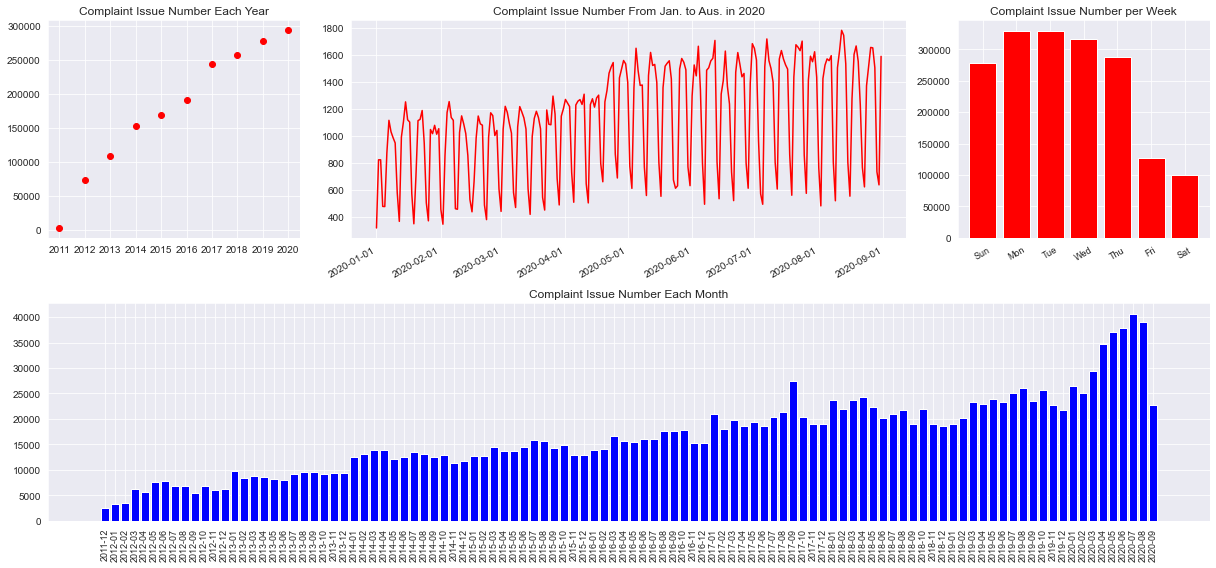

In [187]:
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdate
  
fig = plt.figure(figsize=(17, 8))
gs = gridspec.GridSpec(nrows=2, ncols=4)

ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(year_rank.index.strftime('%Y'),year_rank['Count'],color='r')
ax0.set_title('Complaint Issue Number Each Year')


ax1 = fig.add_subplot(gs[0, 1:3])
ax1.plot(jan_aus_2020_rank['Date received'],jan_aus_2020_rank['Count'],'r-')
ax1.set_title('Complaint Issue Number From Jan. to Aus. in 2020')
ax1.set_xticklabels(jan_aus_2020_rank['Date received'],rotation=30,horizontalalignment='right')
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#设置时间标签显示格式

ax2 = fig.add_subplot(gs[0,3])
ax2.bar(np.arange(len(week_rank)),week_rank['Count'],color='r')
ax2.set_xticks(np.arange(len(week_rank)))
ax2.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],rotation=30,size=9)             
ax2.set_title("Complaint Issue Number per Week")
               
ax3 = fig.add_subplot(gs[1,:])
ind = np.arange(len(month_rank))
ax3.bar(ind,month_rank['Count'],color='b')
ax3.set_xticks(ind)
ax3.set_xticklabels(month_rank['Date received'],rotation=90,size=9)
ax3.set_title('Complaint Issue Number Each Month')
plt.tight_layout()
plt.show()

# Step 3-3 學貸分析

In [188]:
df_stu=df[df['Product']=='Student loan']
df_stu.head(10)

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Date received,,,,,,,,,,,,,,,,,
2019-04-11,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying ...,NaN,Company believes it acted appropriately as aut...,GREAT LAKES,SC,29203,Older American,Consent not provided,Web,2019-04-11,Closed with explanation,Yes,NaN,3208845
2019-02-20,Student loan,Private student loan,Dealing with your lender or servicer,Need information about your loan balance or lo...,My original lender was XXXX XXXX XXXX ; this l...,NaN,"Nelnet, Inc.",OH,NaN,NaN,Consent provided,Web,2019-02-25,Closed with explanation,Yes,NaN,3156880
2019-03-29,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Don't agree with the fees charged,NaN,NaN,"Navient Solutions, LLC.",WA,98115,NaN,NaN,Referral,2019-03-29,Closed with explanation,Yes,NaN,3195253
2019-03-22,Student loan,Private student loan,Struggling to repay your loan,Problem lowering your monthly payments,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CO,80903,NaN,NaN,Phone,2019-03-28,Closed with monetary relief,Yes,NaN,3187899
2019-02-27,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying ...,Great Lakes sent my account to a loan service ...,Company believes it acted appropriately as aut...,GREAT LAKES,MO,631XX,NaN,Consent provided,Web,2019-02-27,Closed with explanation,Yes,NaN,3163988
2019-04-02,Student loan,Federal student loan servicing,Incorrect information on your report,Account status incorrect,NaN,NaN,"Navient Solutions, LLC.",FL,33064,NaN,Consent not provided,Web,2019-04-02,Closed with explanation,Yes,NaN,3198659
2019-04-02,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying ...,NaN,NaN,"Navient Solutions, LLC.",NE,68701,NaN,Consent not provided,Web,2019-04-02,Closed with explanation,Yes,NaN,3199740
2019-04-11,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Don't agree with the fees charged,NaN,NaN,"Navient Solutions, LLC.",CA,94587,NaN,Consent not provided,Web,2019-04-11,Closed with explanation,Yes,NaN,3208714
2019-04-04,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,NaN,Company believes it acted appropriately as aut...,GREAT LAKES,VA,23464,Older American,Consent not provided,Web,2019-04-10,Closed with explanation,Yes,NaN,3202338
